<a href="https://colab.research.google.com/github/hemamotiani/fashion-classification/blob/main/fashionSmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !kaggle datasets download -d paramaggarwal/fashion-product-images-small
# !unzip fashion-product-images-small.zip -d fashionSmall

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashion-product-images-small


In [23]:
import pandas as pd
import os

df = pd.read_csv("/kaggle/input/fashion-product-images-small/styles.csv", on_bad_lines="skip")
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,53584,Men,Accessories,Watches,Watches,White,Winter,2016.0,Casual,Q&Q Men White Dial Watch,53584.jpg
1,13218,Men,Apparel,Topwear,Shirts,White,Fall,2011.0,Casual,Palm Tree Kids Boys Solid White Shirts,13218.jpg
2,35493,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2012.0,Formal,Bata Men Black Formal Shoes,35493.jpg
3,8471,Women,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Casual,Scullers For Her Women Wow Woven Purple Shirts,8471.jpg
4,43064,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Casual,Nike Men Black Dutch T-shirt,43064.jpg


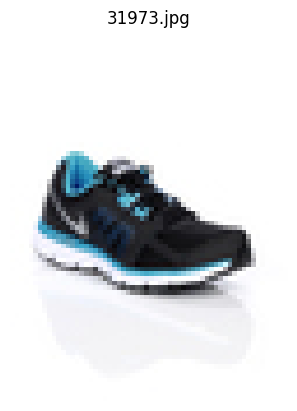

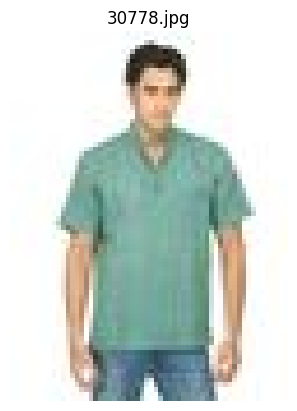

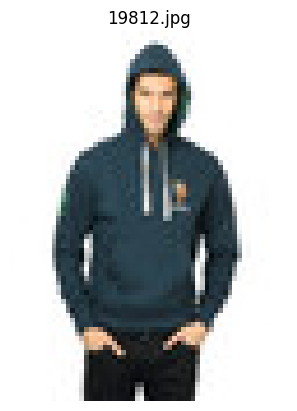

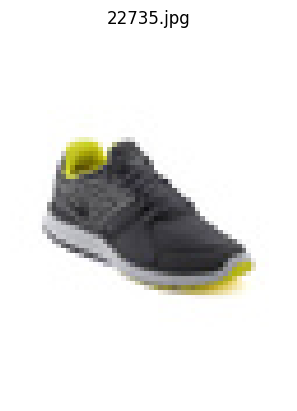

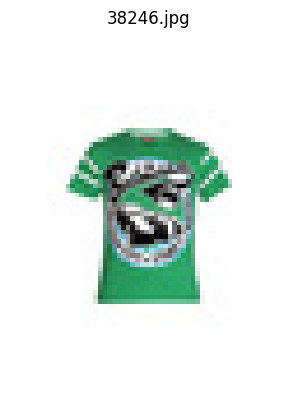

In [24]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = "/kaggle/input/fashion-product-images-small/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files[:5]:
    img_path = os.path.join(image_folder, img_file)

    img = Image.open(img_path)

    plt.imshow(img)
    plt.title(img_file)
    plt.axis("off")
    plt.show()

In [25]:
# check image size
import os
from PIL import Image

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
img_path = os.path.join(image_folder, image_files[0])
img = Image.open(img_path)
img.size


(60, 80)

In [26]:
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

for col in categorical_columns:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


gender Value Counts:
gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64

masterCategory Value Counts:
masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

subCategory Value Counts:
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree    

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


<Figure size 1000x600 with 0 Axes>

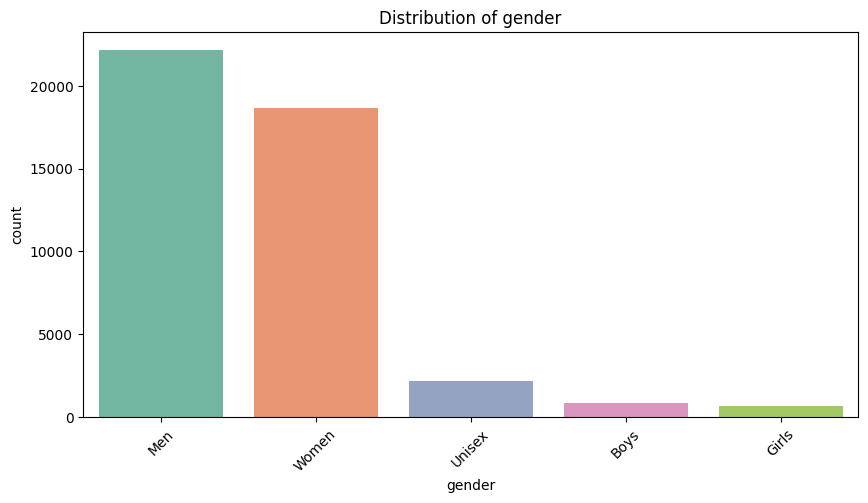

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


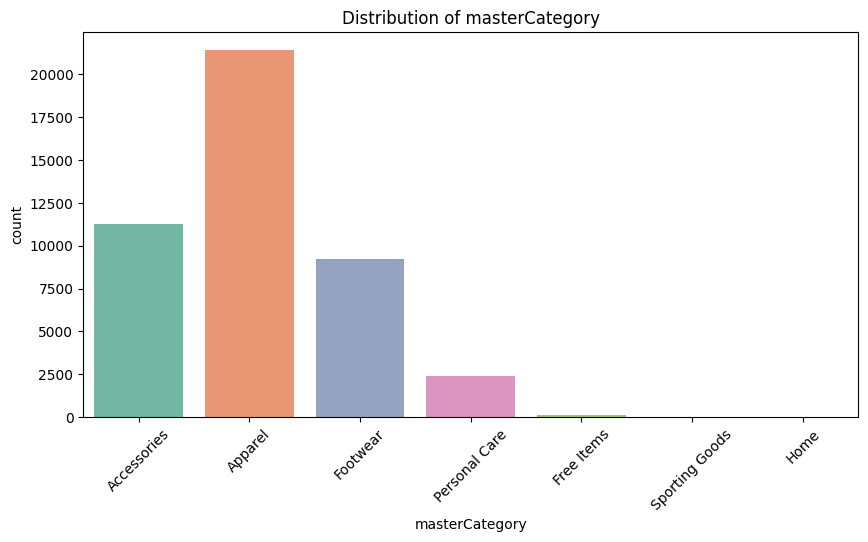

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


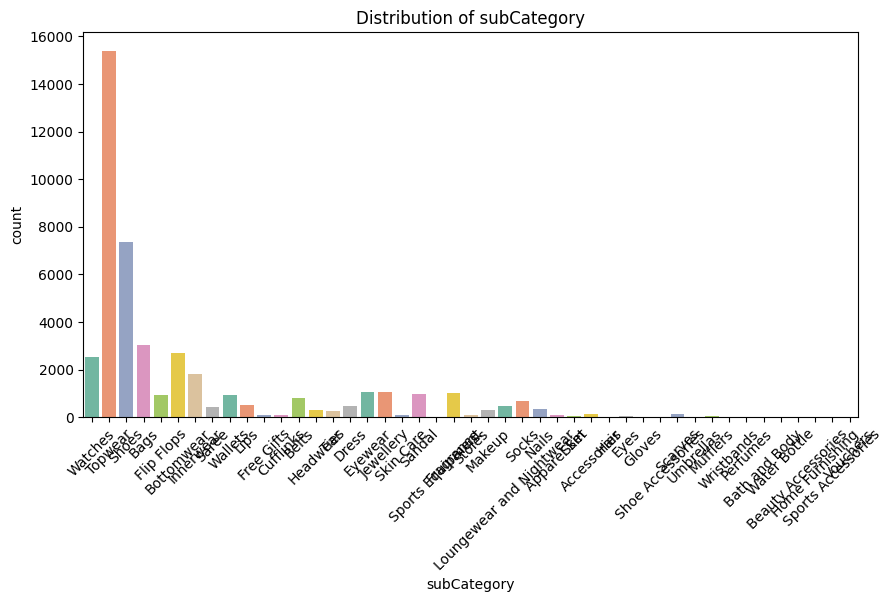

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


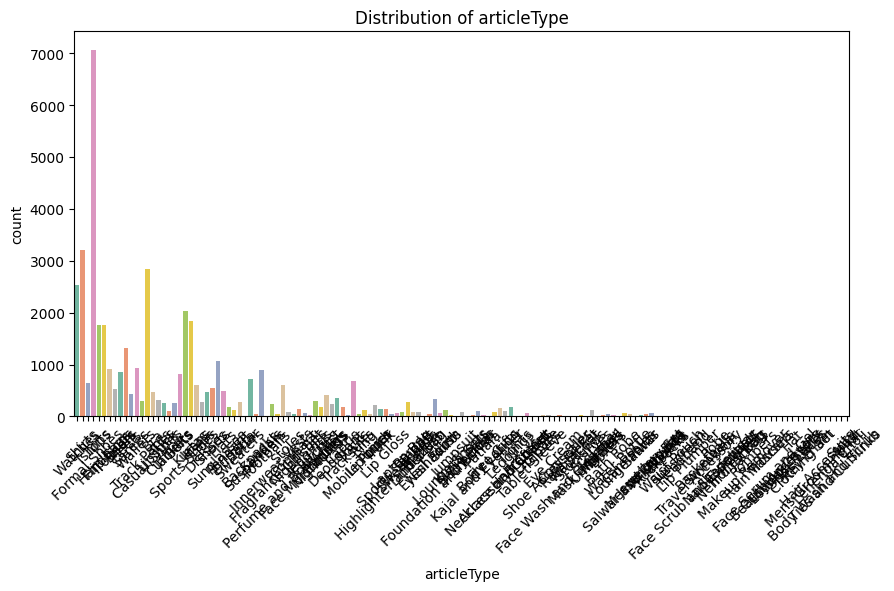

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


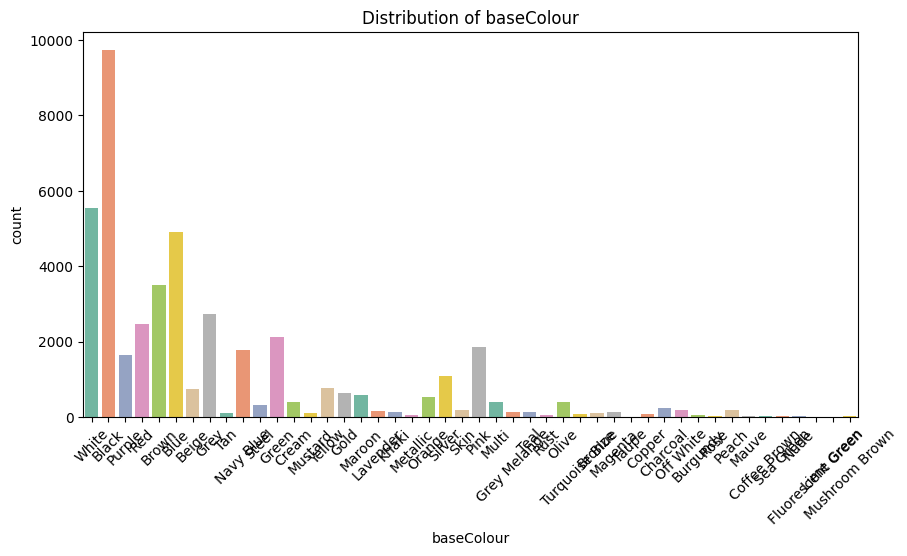

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


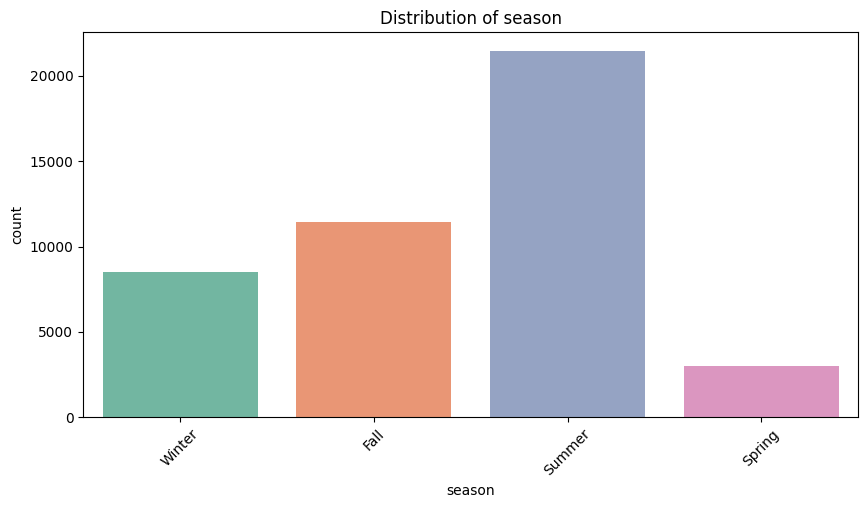

<ipython-input-27-bb77b39570ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


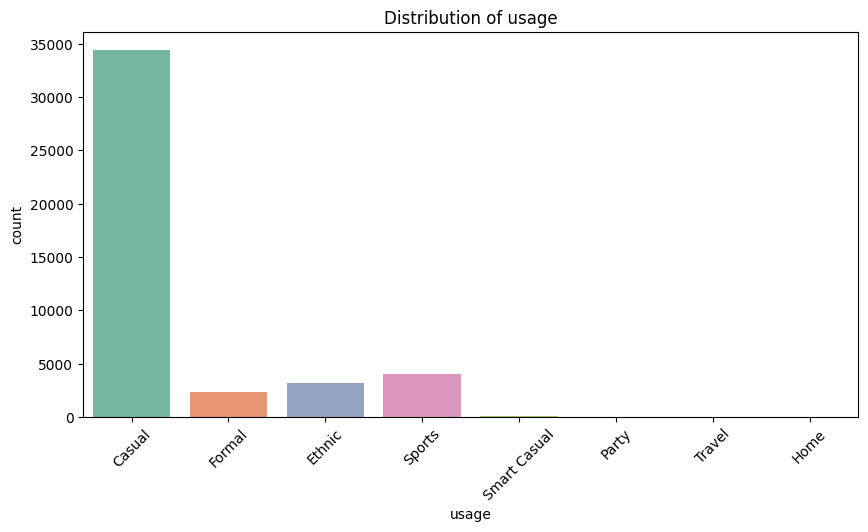

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

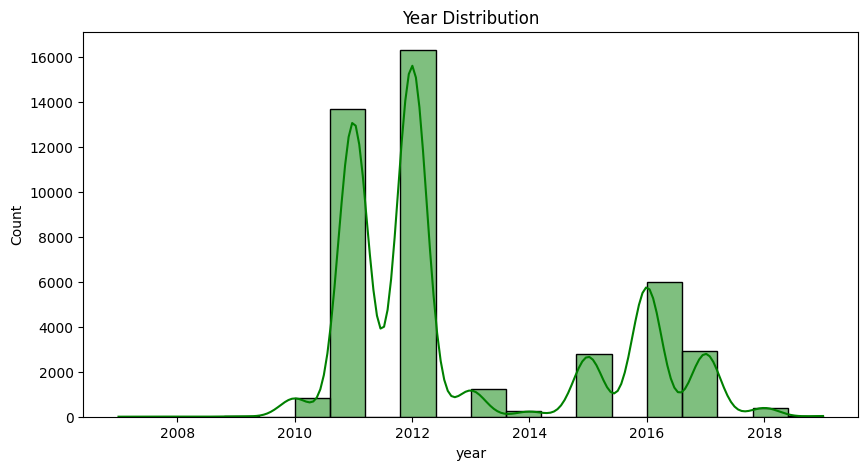

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], kde=True, color='green', bins=20)
plt.title("Year Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

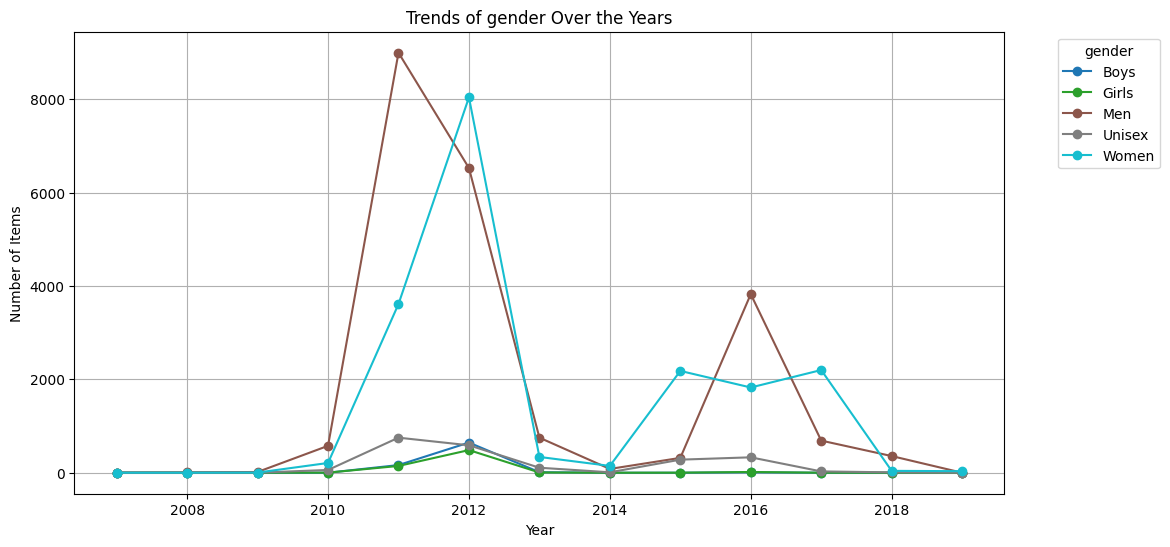

<Figure size 1200x600 with 0 Axes>

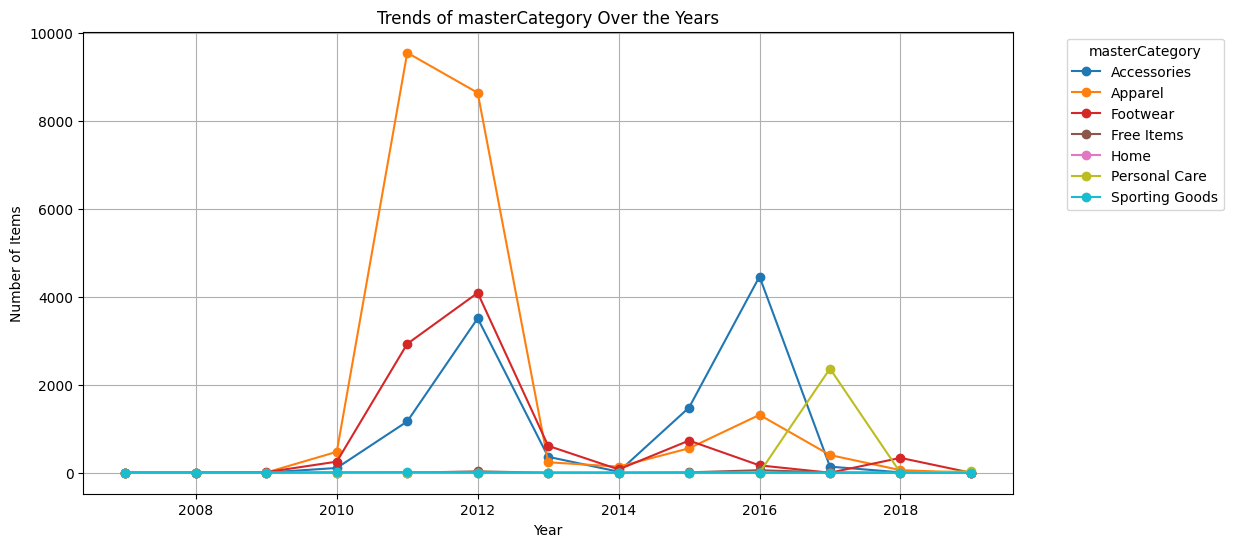

<Figure size 1200x600 with 0 Axes>

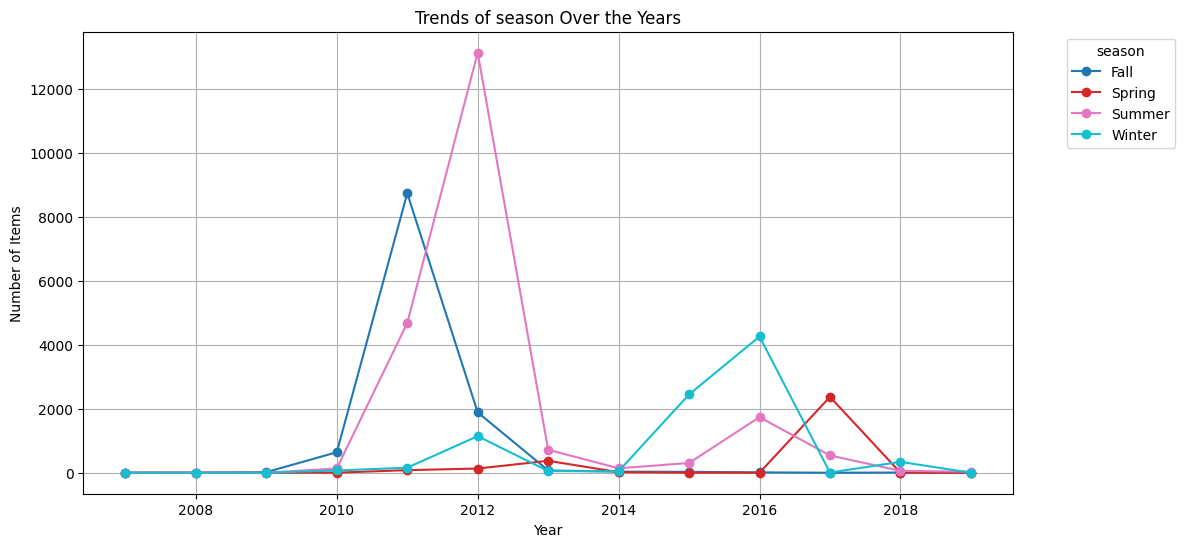

<Figure size 1200x600 with 0 Axes>

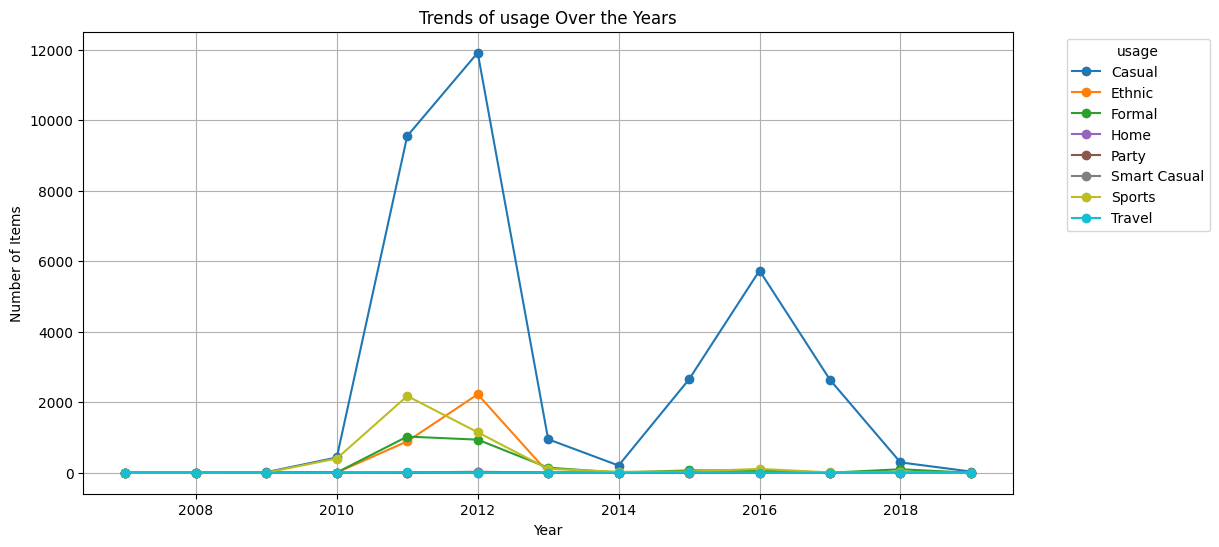

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_columns:
  if col != 'articleType' and col != 'baseColour' and col != 'subCategory':
    usage_trends = df.groupby(['year', col]).size().reset_index(name='count')

    usage_pivot = usage_trends.pivot(index='year', columns=col, values='count').fillna(0)
    plt.figure(figsize=(12, 6))
    usage_pivot.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
    plt.title(f"Trends of {col} Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Items")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [42]:
!pip install keras_preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [46]:
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from sklearn.model_selection import train_test_split



df = pd.read_csv("/kaggle/input/fashion-product-images-small/styles.csv", on_bad_lines="skip")


#remove subcategories with less than 100 samples
min_samples = 100
subcategories_to_remove = df['subCategory'].value_counts()[df['subCategory'].value_counts() < min_samples].index
df = df[~df['subCategory'].isin(subcategories_to_remove)]

df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

print(f"Training Set: {len(train_df)} samples")
print(f"Validation Set: {len(valid_df)} samples")
print(f"Testing Set: {len(test_df)} samples")

batch_size = 32
image_folder = "/kaggle/input/fashion-product-images-small/images"

image_generator = ImageDataGenerator()

training_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=True,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=True
)


test_generator = image_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

Training Set: 28146 samples
Validation Set: 7037 samples
Testing Set: 8796 samples


/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 28142 validated image filenames belonging to 27 classes.
Found 7037 validated image filenames belonging to 27 classes.
Found 8795 validated image filenames belonging to 27 classes.


/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(27, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,259 (6.62 MB)

 Trainable params: 1,735,259 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
history = model.fit(
    training_generator,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(valid_df) // batch_size
)

Epoch 1/10
704/879 ━━━━━━━━━━━━━━━━━━━━ 1:29 509ms/step - accuracy: 0.5021 - loss: 8.8113

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


879/879 ━━━━━━━━━━━━━━━━━━━━ 390s 440ms/step - accuracy: 0.5336 - loss: 7.5518 - val_accuracy: 0.8435 - val_loss: 0.5898
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 366s 416ms/step - accuracy: 0.8073 - loss: 0.7109 - val_accuracy: 0.8714 - val_loss: 0.4492
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 358s 407ms/step - accuracy: 0.8474 - loss: 0.5510 - val_accuracy: 0.8849 - val_loss: 0.4283
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 385s 411ms/step - accuracy: 0.8625 - loss: 0.4850 - val_accuracy: 0.7584 - val_loss: 1.0016
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 361s 410ms/step - accuracy: 0.8393 - loss: 0.5712 - val_accuracy: 0.9028 - val_loss: 0.3761
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 384s 413ms/step - accuracy: 0.8862 - loss: 0.3933 - val_accuracy: 0.9057 - val_loss: 0.3455
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 376s 406ms/step - accuracy: 0.8989 - loss: 0.3552 - val_accuracy: 0.9083 - val_loss: 0.3282
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 385s 410ms/step - accuracy: 0.9060 - loss: 0.31

In [51]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_df) // batch_size)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.9187 - loss: 0.3187
Test Accuracy: 92.11%


In [52]:
import numpy as np
predictions = model.predict(test_generator, steps=len(test_df) // batch_size)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_df['subCategory'].values


class_indices = test_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}


predicted_class_names = [inv_class_indices[label] for label in predicted_labels]

print(f"Predicted Labels (class names): \n{predicted_class_names[50:80]}")
print(f"True Labels (class names): \n{true_labels[50:80].tolist()}")

274/274 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step
Predicted Labels (class names): 
['Topwear', 'Shoes', 'Topwear', 'Eyewear', 'Topwear', 'Bags', 'Socks', 'Topwear', 'Topwear', 'Saree', 'Topwear', 'Bags', 'Topwear', 'Innerwear', 'Innerwear', 'Jewellery', 'Jewellery', 'Topwear', 'Shoes', 'Shoes', 'Topwear', 'Innerwear', 'Bags', 'Topwear', 'Shoes', 'Watches', 'Topwear', 'Eyewear', 'Belts', 'Topwear']
True Labels (class names): 
['Topwear', 'Shoes', 'Innerwear', 'Eyewear', 'Topwear', 'Bags', 'Socks', 'Innerwear', 'Topwear', 'Saree', 'Dress', 'Wallets', 'Topwear', 'Innerwear', 'Innerwear', 'Jewellery', 'Jewellery', 'Topwear', 'Shoes', 'Shoes', 'Topwear', 'Innerwear', 'Wallets', 'Topwear', 'Shoes', 'Watches', 'Topwear', 'Eyewear', 'Belts', 'Topwear']


Classification Report:

                          precision    recall  f1-score   support

             Accessories       0.29      0.21      0.24        29
             Apparel Set       0.07      0.05      0.06        21
                    Bags       0.17      0.19      0.18       648
                   Belts       0.12      0.12      0.12       171
              Bottomwear       0.22      0.23      0.23       526
               Cufflinks       0.07      0.06      0.06        18
                   Dress       0.18      0.04      0.06        84
                 Eyewear       0.21      0.21      0.21       217
              Flip Flops       0.17      0.20      0.18       169
               Fragrance       0.15      0.16      0.16       190
              Free Gifts       0.00      0.00      0.00        19
                Headwear       0.19      0.15      0.17        60
               Innerwear       0.18      0.16      0.17       376
               Jewellery       0.16      0.16      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


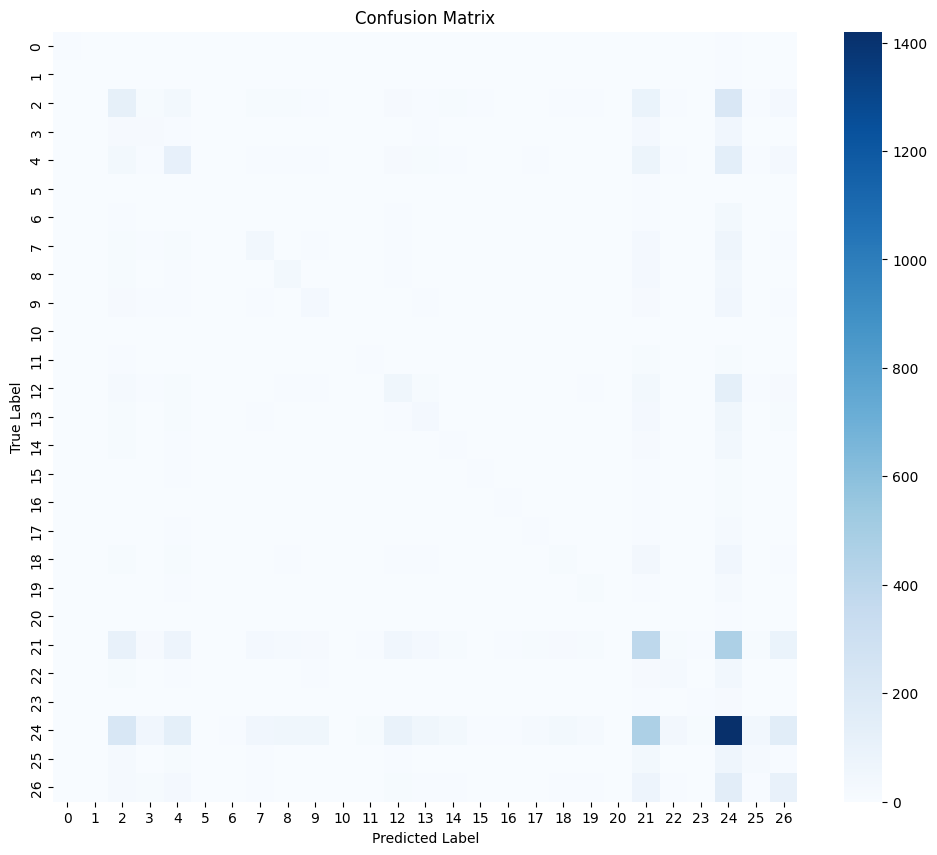

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels in numeric form using the class index map
true_class_indices = test_df['subCategory'].map(class_indices).values[:len(predicted_labels)]

# Classification report
print("Classification Report:\n")
print(classification_report(true_class_indices, predicted_labels, target_names=class_indices.keys()))

# F1 Score (macro average)
f1 = f1_score(true_class_indices, predicted_labels, average='macro')
print(f"Macro-averaged F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(true_class_indices, predicted_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
